# Data Scientist Challenge - LATAM Airlines
## Germán Donoso Henríquez

In [413]:
#Librerias
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats
import scipy.stats as st
import statsmodels as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
import math
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import warnings
#import statsmodels.api as sm 
import seaborn as sns
import pylab as py 
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df_scl = pd.read_csv("dataset_SCL.csv")
df_scl.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


## 1. Distribución de los Datos

In [6]:
df_scl.shape

(68206, 18)

In [7]:
df_scl.dtypes

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

In [11]:
df_scl["Fecha-I"] = pd.to_datetime(df_scl["Fecha-I"], format='%Y-%m-%d %H:%M:%S')
df_scl["Fecha-O"] = pd.to_datetime(df_scl["Fecha-O"], format='%Y-%m-%d %H:%M:%S')

In [16]:
df_scl.isna().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [41]:
df_scl.replace("", np.nan).isna().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [17]:
df_scl[df_scl["Vlo-O"].isna()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


### Fecha

In [80]:
df_scl["AÑO"].unique()

array([2017, 2018], dtype=int64)

In [44]:
df_scl["Fecha-I"].min()

Timestamp('2017-01-01 00:15:00')

In [45]:
df_scl["Fecha-I"].max()

Timestamp('2017-12-31 23:55:00')

In [81]:
df_scl["Fecha-O"].max()

Timestamp('2018-01-01 00:12:00')

In [82]:
df_scl[df_scl["Fecha-O"].dt.year==2018]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
66918,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602.0,SCEL,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico


Text(0.5, 1.0, 'Vuelos por Mes')

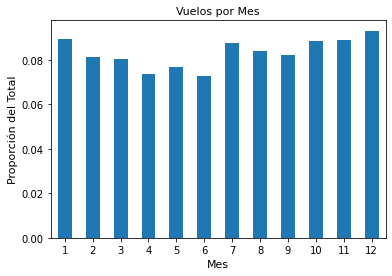

In [160]:
ax = df_scl["MES"].value_counts(normalize=True).sort_index().plot(kind="bar", rot=0)
ax.set_xlabel("Mes", fontsize=11)
ax.set_ylabel("Proporción del Total", fontsize=11)
ax.set_title("Vuelos por Mes", fontsize=11)

Text(0.5, 1.0, 'Vuelos según Día del Mes')

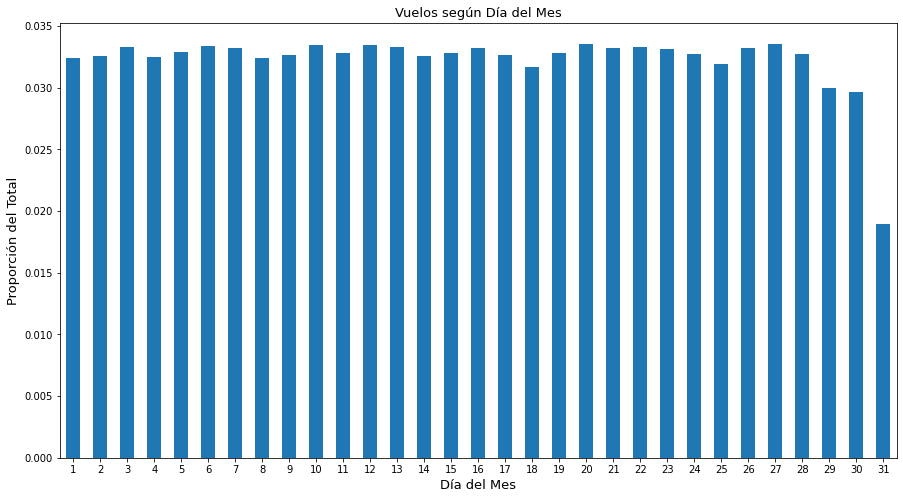

In [161]:
ax = df_scl["DIA"].value_counts(normalize=True).sort_index().plot(kind="bar", figsize=(15,8), rot=0)
ax.set_xlabel("Día del Mes", fontsize=13)
ax.set_ylabel("Proporción del Total", fontsize=13)
ax.set_title("Vuelos según Día del Mes", fontsize=13)

Text(0.5, 1.0, 'Vuelos por Día de la Semana')

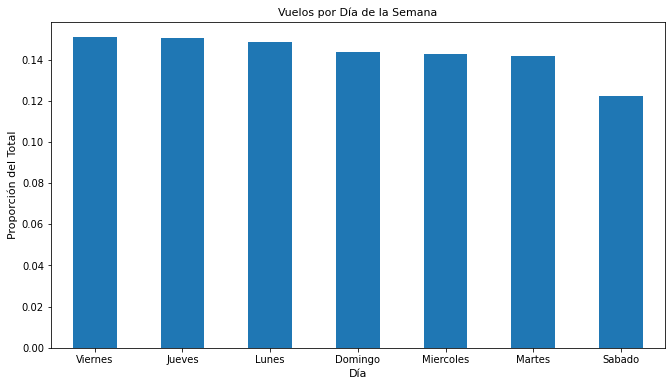

In [164]:
ax = df_scl["DIANOM"].value_counts(normalize=True).plot(kind="bar", rot=0, figsize=(11,6))
ax.set_xlabel("Día", fontsize=11)
ax.set_ylabel("Proporción del Total", fontsize=11)
ax.set_title("Vuelos por Día de la Semana", fontsize=11)

Text(0.5, 1.0, 'Vuelos según Hora del Día')

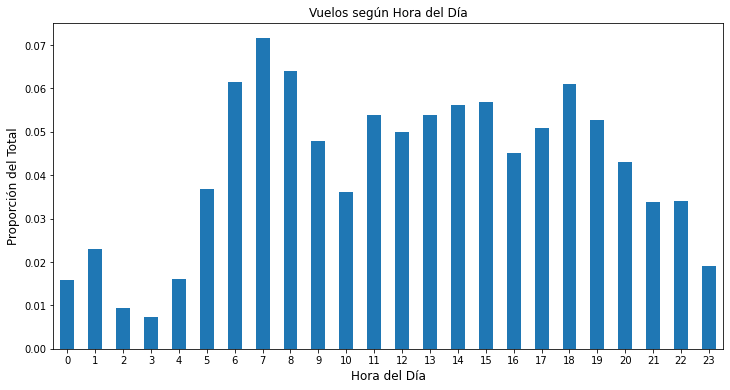

In [165]:
ax = df_scl["Fecha-I"].dt.hour.value_counts(normalize=True).sort_index().plot(kind="bar", figsize=(12,6), rot=0)
ax.set_xlabel("Hora del Día", fontsize=12)
ax.set_ylabel("Proporción del Total", fontsize=12)
ax.set_title("Vuelos según Hora del Día", fontsize=12)

### Número de Vuelo

In [59]:
df_scl["Vlo-I"].nunique()

750

In [60]:
df_scl["Vlo-O"].nunique()

866

In [62]:
np.where(df_scl["Vlo-I"]!=df_scl["Vlo-O"], 1, 0).sum()

1850

Quiere decir que hay vuelos que no tienen el mismo número de vuelo programado y de operación.

### Origen del Vuelo

In [42]:
df_scl["Ori-I"].unique()

array(['SCEL'], dtype=object)

In [43]:
df_scl["Ori-O"].unique()

array(['SCEL'], dtype=object)

In [91]:
df_scl["SIGLAORI"].unique()

array(['Santiago'], dtype=object)

Hay 68 mil vuelos con origen Santiago, Chile para el 2017.

### Destino del Vuelo

In [46]:
df_scl["Des-I"].unique()

array(['KMIA', 'KDFW', 'SAEZ', 'CYYZ', 'LFPG', 'MMMX', 'SABE', 'SKBO',
       'LIRF', 'EGLL', 'MPTO', 'KATL', 'SBGR', 'SBGL', 'SBFL', 'LEMD',
       'SPJC', 'YSSY', 'KIAH', 'SGAS', 'SBFI', 'SCTE', 'SCCI', 'SCNT',
       'SCBA', 'SCVD', 'SCQP', 'SCIE', 'SCSE', 'SCAT', 'SCCF', 'SCFA',
       'SCDA', 'SCAR', 'SAME', 'SACO', 'SUMU', 'SCPQ', 'SCJO', 'KMCO',
       'KJFK', 'SEGU', 'MMUN', 'MDPC', 'KLAX', 'NZAA', 'SCIP', 'SLLP',
       'SLVR', 'SBCT', 'SEQM', 'SAZS', 'SAAR', 'SANT', 'YMML', 'SEQU',
       'SANU', 'SAZN', 'SPSO', 'SAWH', 'EGYP', 'SULS', 'SLCB', 'SARI'],
      dtype=object)

In [47]:
df_scl["Des-I"].nunique()

64

Text(0.5, 1.0, 'Vuelos según Código Ciudad de Destino')

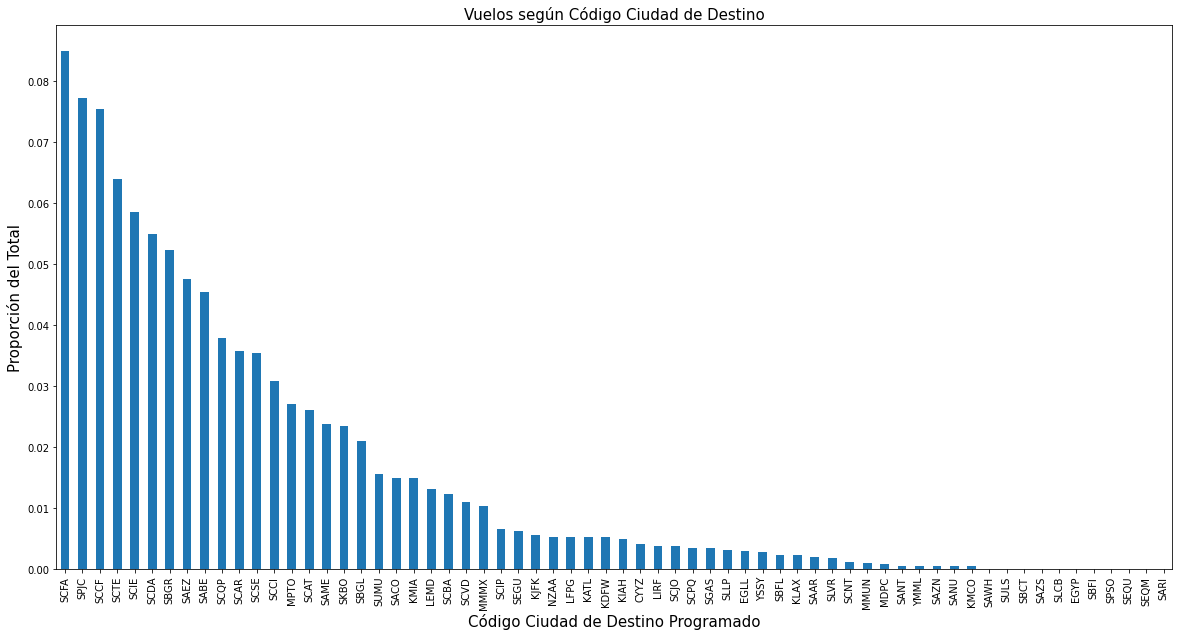

In [148]:
ax = df_scl["Des-I"].value_counts(normalize=True).plot(kind="bar", figsize=(20,10))
ax.set_xlabel("Código Ciudad de Destino Programado", fontsize=15)
ax.set_ylabel("Proporción del Total", fontsize=15)
ax.set_title("Vuelos según Código Ciudad de Destino", fontsize=15)

In [49]:
df_scl["Des-O"].nunique()

63

In [76]:
set(df_scl["Des-I"]).difference(set(df_scl["Des-O"]))

{'SARI', 'SEQU'}

In [77]:
set(df_scl["Des-O"]).difference(set(df_scl["Des-I"]))

{'KIAD'}

In [63]:
np.where(df_scl["Des-I"]!=df_scl["Des-O"], 1, 0).sum()

28

In [92]:
df_scl["SIGLADES"].unique()

array(['Miami', 'Dallas', 'Buenos Aires', 'Toronto', 'Paris',
       'Ciudad de Mexico', 'Bogota', 'Roma', 'Londres',
       'Ciudad de Panama', 'Atlanta', 'Sao Paulo', 'Rio de Janeiro',
       'Florianapolis', 'Madrid', 'Lima', 'Sydney', 'Houston', 'Asuncion',
       'Cataratas Iguacu', 'Puerto Montt', 'Punta Arenas',
       'Puerto Natales', 'Balmaceda', 'Temuco', 'Valdivia', 'Concepcion',
       'La Serena', 'Copiapo', 'Calama', 'Antofagasta', 'Iquique',
       'Arica', 'Mendoza', 'Cordoba', 'Montevideo', 'Castro (Chiloe)',
       'Osorno', 'Orlando', 'Nueva York', 'Guayaquil', 'Cancun',
       'Punta Cana', 'Los Angeles', 'Auckland N.Z.', 'Isla de Pascua',
       'La Paz', 'Santa Cruz', 'Curitiba, Bra.', 'Quito', 'Bariloche',
       'Rosario', 'Washington', 'Tucuman', 'Melbourne', 'San Juan, Arg.',
       'Neuquen', 'Pisco, Peru', 'Ushuia', 'Puerto Stanley',
       'Punta del Este', 'Cochabamba'], dtype=object)

In [93]:
df_scl["SIGLADES"].nunique()

62

Text(0.5, 1.0, 'Vuelos según Ciudad de Destino')

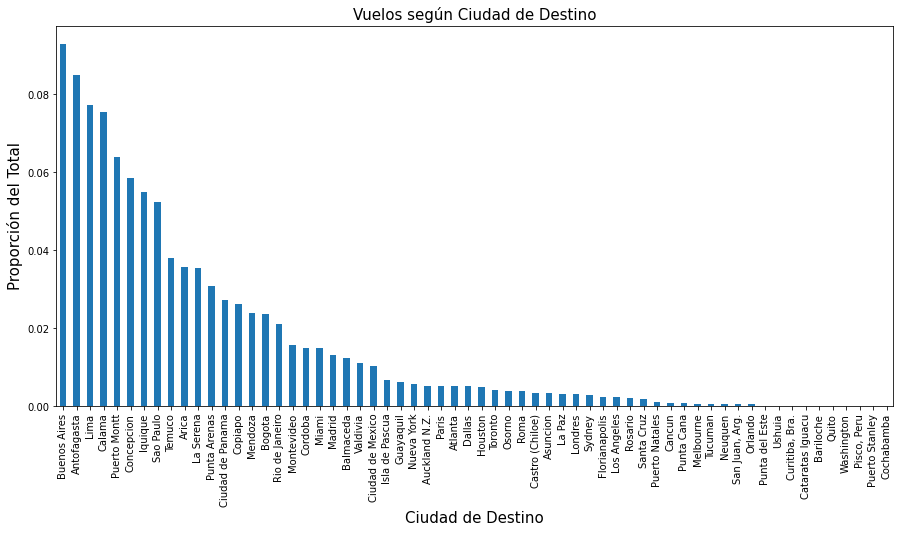

In [149]:
ax = df_scl["SIGLADES"].value_counts(normalize=True).plot(kind="bar", figsize=(15,7))
ax.set_xlabel("Ciudad de Destino", fontsize=15)
ax.set_ylabel("Proporción del Total", fontsize=15)
ax.set_title("Vuelos según Ciudad de Destino", fontsize=15)

### Código de Aerolínea

In [75]:
df_scl["Emp-I"].unique()

array(['AAL', 'ACA', 'AFR', 'AMX', 'ARG', 'AUT', 'AVA', 'AZA', 'BAW',
       'CMP', 'DAL', 'GLO', 'IBE', 'KLM', 'QFU', 'UAL', 'LAP', 'TAM',
       'SKU', 'LAN', 'LAW', 'JMR', 'LXP', 'LNE', 'LPE', 'DSM', 'PUE',
       'JAT', 'ONE', 'LRC'], dtype=object)

In [68]:
df_scl["Emp-I"].nunique()

30

In [69]:
df_scl["Emp-O"].nunique()

32

In [78]:
set(df_scl["Emp-I"]).difference(set(df_scl["Emp-O"]))

{'LAW', 'QFU'}

In [79]:
set(df_scl["Emp-O"]).difference(set(df_scl["Emp-I"]))

{'48O', '56R', 'QFA', 'TPU'}

In [71]:
np.where(df_scl["Emp-I"]!=df_scl["Emp-O"], 1, 0).sum()

18669

Text(0.5, 1.0, 'Vuelos según Código Aerolínea')

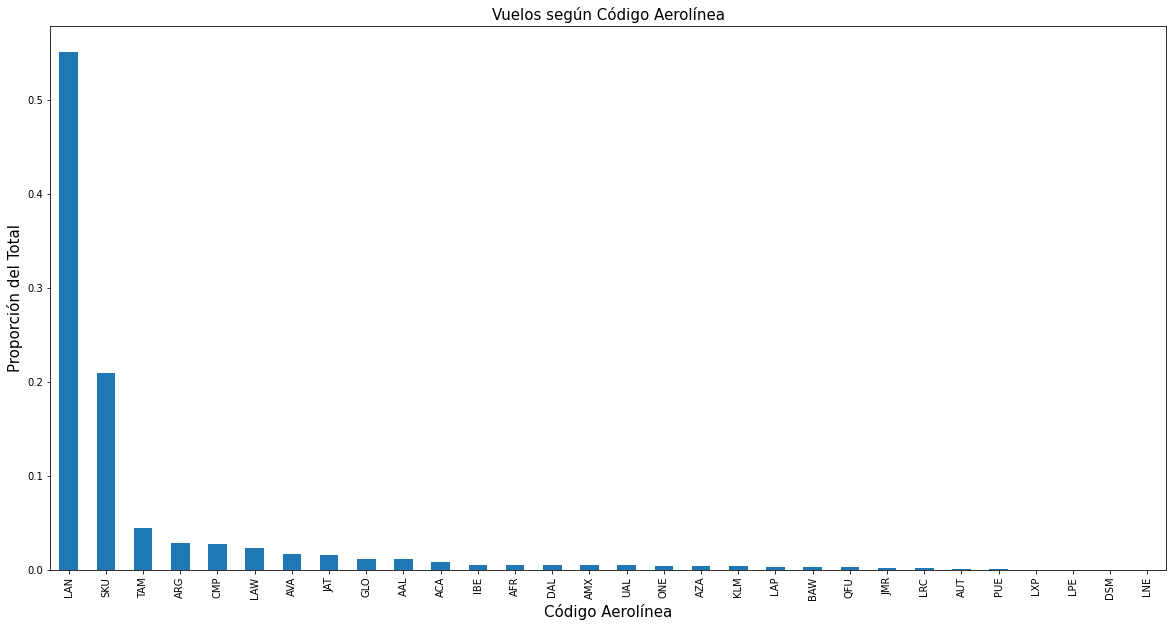

In [150]:
ax = df_scl["Emp-I"].value_counts(normalize=True).plot(kind="bar", figsize=(20,10))
ax.set_xlabel("Código Aerolínea de Vuelo Programado", fontsize=15)
ax.set_ylabel("Proporción del Total", fontsize=15)
ax.set_title("Vuelos según Código Aerolínea de Vuelo Programado", fontsize=15)

Text(0.5, 1.0, 'Vuelos según Código Aerolínea de Vuelo Operado')

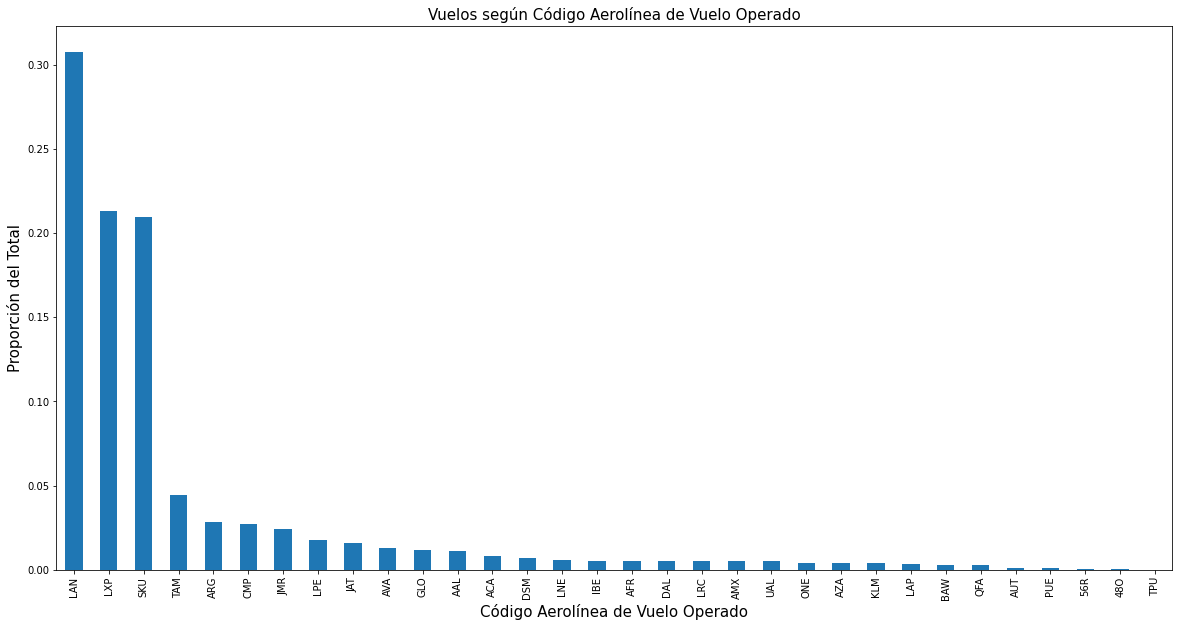

In [151]:
ax = df_scl["Emp-O"].value_counts(normalize=True).plot(kind="bar", figsize=(20,10))
ax.set_xlabel("Código Aerolínea de Vuelo Operado", fontsize=15)
ax.set_ylabel("Proporción del Total", fontsize=15)
ax.set_title("Vuelos según Código Aerolínea de Vuelo Operado", fontsize=15)

### Tipo de Vuelo

In [85]:
df_scl["TIPOVUELO"].value_counts(normalize=True)

N    0.541976
I    0.458024
Name: TIPOVUELO, dtype: float64

### Aerolínea que Opera

In [86]:
df_scl["OPERA"].unique()

array(['American Airlines', 'Air Canada', 'Air France', 'Aeromexico',
       'Aerolineas Argentinas', 'Austral', 'Avianca', 'Alitalia',
       'British Airways', 'Copa Air', 'Delta Air', 'Gol Trans', 'Iberia',
       'K.L.M.', 'Qantas Airways', 'United Airlines', 'Grupo LATAM',
       'Sky Airline', 'Latin American Wings', 'Plus Ultra Lineas Aereas',
       'JetSmart SPA', 'Oceanair Linhas Aereas', 'Lacsa'], dtype=object)

In [87]:
df_scl["OPERA"].nunique()

23

Text(0.5, 1.0, 'Vuelos según Aerolínea')

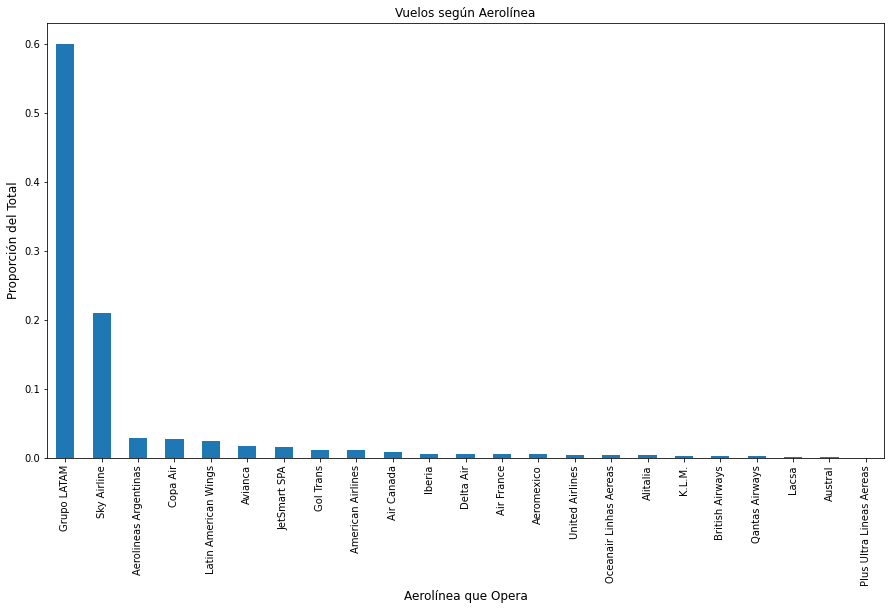

In [170]:
ax = df_scl["OPERA"].value_counts(normalize=True).plot(kind="bar", figsize=(15,8))
ax.set_xlabel("Aerolínea que Opera", fontsize=12)
ax.set_ylabel("Proporción del Total", fontsize=12)
ax.set_title("Vuelos según Aerolínea", fontsize=12)

## 2. Generación de Columnas Adicionales

In [99]:
fecha_i_md = df_scl["Fecha-I"].dt.strftime("%m-%d")

In [104]:
df_scl["temporada_alta"] = (((fecha_i_md >= "12-15") | (fecha_i_md <= "03-03")) | ((fecha_i_md >= "07-15") & (fecha_i_md <= "07-31")) | ((fecha_i_md >= "09-11") & (fecha_i_md <= "09-30"))).astype(int)

In [111]:
df_scl["diff_min"] = (df_scl["Fecha-O"] - df_scl["Fecha-I"]).dt.total_seconds()/60

In [121]:
df_scl["Fecha-I"].dt.strftime("%S").unique()

array(['00'], dtype=object)

In [122]:
df_scl["Fecha-O"].dt.strftime("%S").unique()

array(['00'], dtype=object)

In [124]:
df_scl["diff_min"] = df_scl["diff_min"].astype(int)

In [112]:
df_scl["atraso_15"] = np.where(df_scl["diff_min"]>15, 1, 0)

In [113]:
def periodo(x):
    x = str(x)
    if x >= "05:00" and x <= "11:59":
        return "mañana"
    elif x >= "12:00" and x <= "18:59":
        return "tarde"
    else:
        return "noche"

In [114]:
df_scl["periodo_dia"] = df_scl["Fecha-I"].dt.strftime("%H:%M").apply(periodo)

In [125]:
df_scl.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,diff_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2,0,noche


In [127]:
df_scl[["temporada_alta", "diff_min", "atraso_15", "periodo_dia"]].to_csv("synthetic_features.csv", index=False)

## Análisis de los Datos

Text(0.5, 1.0, 'Histograma Minutos de Atraso')

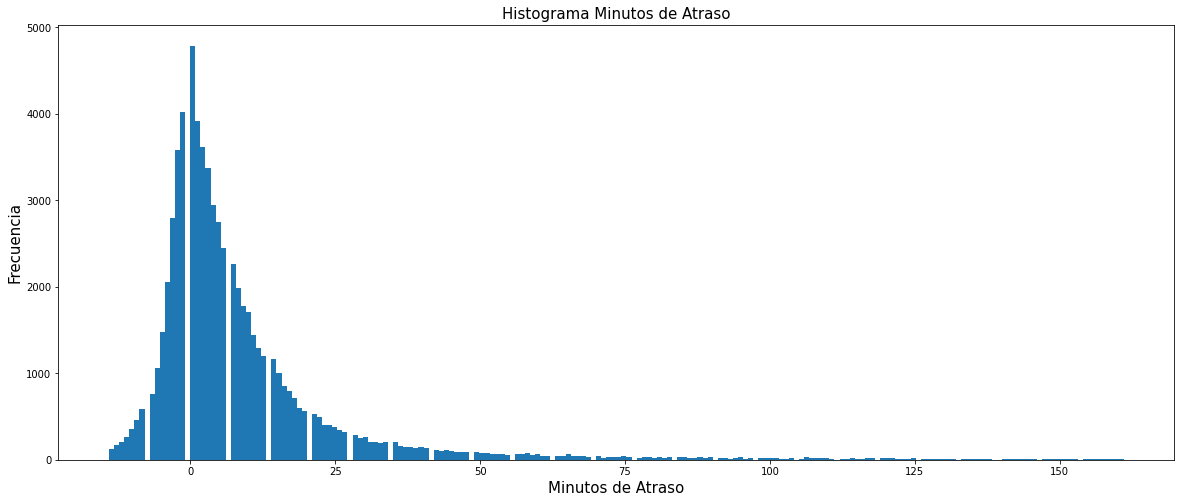

In [136]:
ax = df_scl["diff_min"].plot.hist(bins=200, figsize=(20,8))
ax.set_xlabel("Minutos de Atraso", fontsize=15)
ax.set_ylabel("Frecuencia", fontsize=15)
ax.set_title("Histograma Minutos de Atraso", fontsize=15)

In [131]:
df_scl["atraso_15"].value_counts(normalize=True)

0    0.81506
1    0.18494
Name: atraso_15, dtype: float64

### Tasa de Atraso por Destino

In [183]:
df_siglades_min = df_scl.groupby("SIGLADES")["diff_min"].mean().reset_index()
df_siglades_min

,SIGLADES,diff_min
0,Antofagasta,7.024542
1,Arica,7.143678
2,Asuncion,12.969828
3,Atlanta,0.114525
4,Auckland N.Z.,18.246537
...,...,...
57,Toronto,15.766784
58,Tucuman,14.263158
59,Ushuia,24.500000
60,Valdivia,7.982736


Text(0.5, 1.0, 'Atraso Promedio (min.) según Ciudad de Destino')

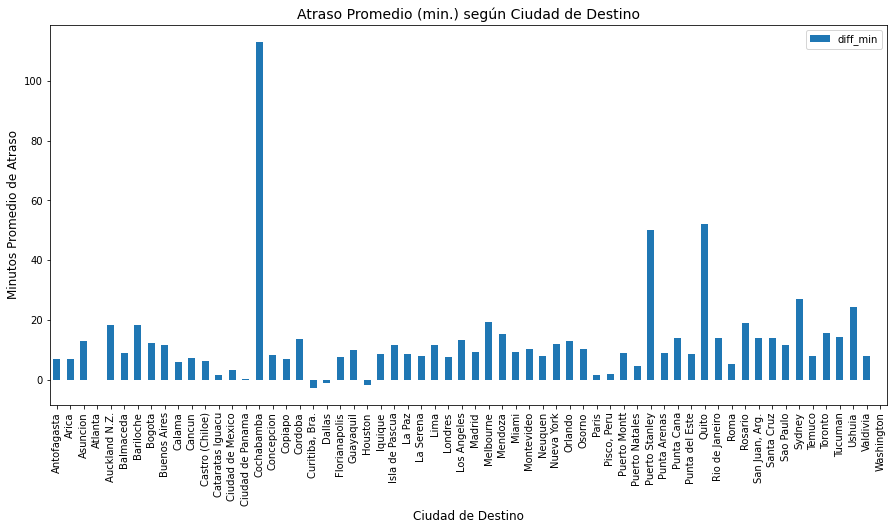

In [184]:
ax=df_siglades_min.plot(x="SIGLADES", y="diff_min", kind="bar", figsize=(15,7))
ax.set_xlabel("Ciudad de Destino", fontsize=12)
ax.set_ylabel("Minutos Promedio de Atraso", fontsize=12)
ax.set_title("Atraso Promedio (min.) según Ciudad de Destino", fontsize=14)

In [178]:
df_siglades = df_scl.groupby("SIGLADES")["atraso_15"].mean().reset_index()
df_siglades["atraso_15"] = df_siglades["atraso_15"]*100
df_siglades

,SIGLADES,atraso_15
0,Antofagasta,14.638783
1,Arica,13.546798
2,Asuncion,28.448276
3,Atlanta,5.865922
4,Auckland N.Z.,37.396122
...,...,...
57,Toronto,31.448763
58,Tucuman,26.315789
59,Ushuia,66.666667
60,Valdivia,15.537849


Text(0.5, 1.0, 'Porcentaje Promedio de Vuelos con Atraso según Ciudad de Destino')

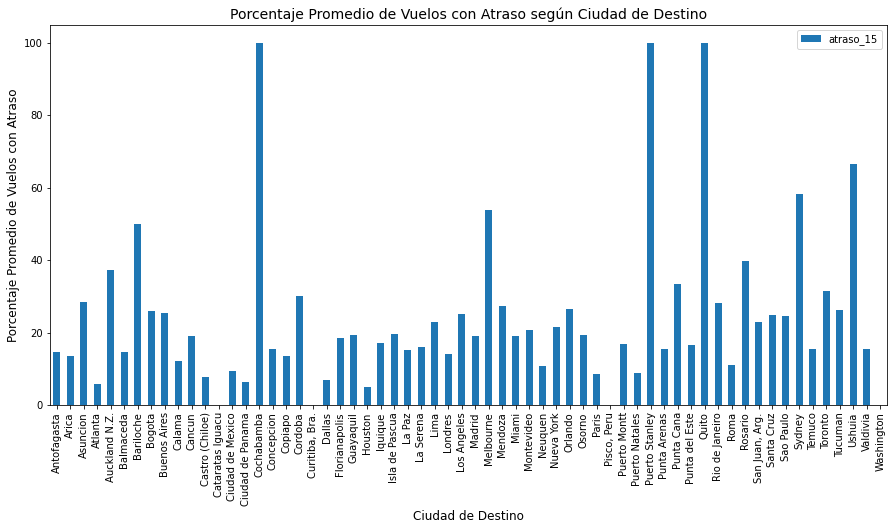

In [179]:
ax=df_siglades.plot(x="SIGLADES", y="atraso_15", kind="bar", figsize=(15,7))
ax.set_xlabel("Ciudad de Destino", fontsize=12)
ax.set_ylabel("Porcentaje Promedio de Vuelos con Atraso", fontsize=12)
ax.set_title("Porcentaje Promedio de Vuelos con Atraso según Ciudad de Destino", fontsize=14)

### Tasa de Atraso por Aerolínea

In [185]:
df_opera_min = df_scl.groupby("OPERA")["diff_min"].mean().reset_index()
df_opera_min

,OPERA,diff_min
0,Aerolineas Argentinas,10.004618
1,Aeromexico,-2.495726
2,Air Canada,22.909735
3,Air France,1.399441
4,Alitalia,5.293436
5,American Airlines,0.277411
6,Austral,6.608108
7,Avianca,11.131944
8,British Airways,7.560976
9,Copa Air,0.214054


Text(0.5, 1.0, 'Atraso Promedio (min.) según Aerolínea')

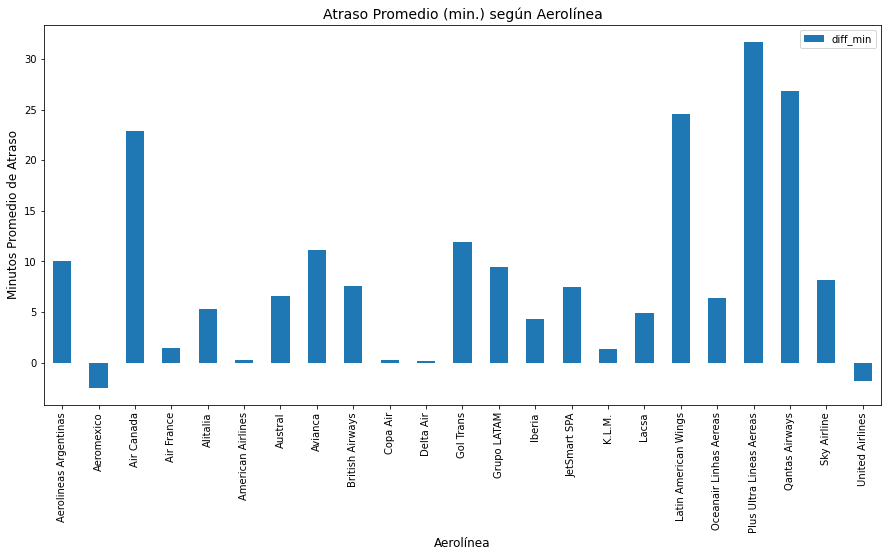

In [187]:
ax=df_opera_min.plot(x="OPERA", y="diff_min", kind="bar", figsize=(15,7))
ax.set_xlabel("Aerolínea", fontsize=12)
ax.set_ylabel("Minutos Promedio de Atraso", fontsize=12)
ax.set_title("Atraso Promedio (min.) según Aerolínea", fontsize=14)

In [189]:
df_opera = df_scl.groupby("OPERA")["atraso_15"].mean().reset_index()
df_opera["atraso_15"] = df_opera["atraso_15"]*100
df_opera

,OPERA,atraso_15
0,Aerolineas Argentinas,24.012314
1,Aeromexico,2.849003
2,Air Canada,45.663717
3,Air France,8.379888
4,Alitalia,11.196911
5,American Airlines,6.737120
6,Austral,20.270270
7,Avianca,26.562500
8,British Airways,14.146341
9,Copa Air,6.270270


Text(0.5, 1.0, 'Porcentaje Promedio de Vuelos con Atraso según Aerolínea')

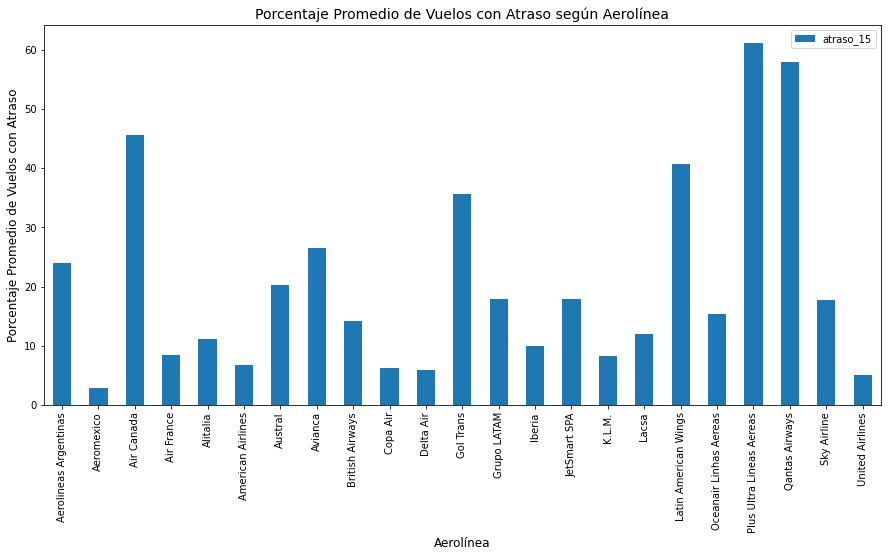

In [190]:
ax=df_opera.plot(x="OPERA", y="atraso_15", kind="bar", figsize=(15,7))
ax.set_xlabel("Aerolínea", fontsize=12)
ax.set_ylabel("Porcentaje Promedio de Vuelos con Atraso", fontsize=12)
ax.set_title("Porcentaje Promedio de Vuelos con Atraso según Aerolínea", fontsize=14)

### Tasa de Atraso por Mes del Año

In [191]:
df_mes_min = df_scl.groupby("MES")["diff_min"].mean().reset_index()
df_mes_min

,MES,diff_min
0,1,7.769646
1,2,7.537853
2,3,5.757205
3,4,5.773506
4,5,7.521756
5,6,8.542461
6,7,15.372163
7,8,8.616818
8,9,8.497326
9,10,11.295922


Text(0.5, 1.0, 'Atraso Promedio (min.) según Mes')

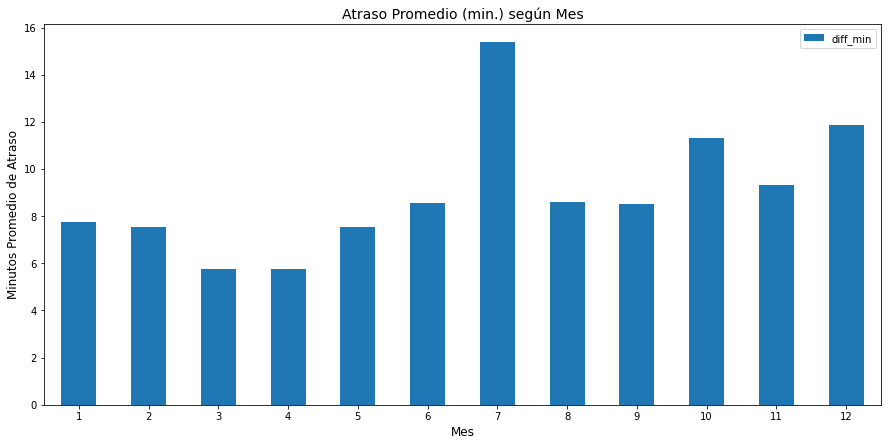

In [193]:
ax=df_mes_min.plot(x="MES", y="diff_min", kind="bar", figsize=(15,7), rot=0)
ax.set_xlabel("Mes", fontsize=12)
ax.set_ylabel("Minutos Promedio de Atraso", fontsize=12)
ax.set_title("Atraso Promedio (min.) según Mes", fontsize=14)

In [194]:
df_mes = df_scl.groupby("MES")["atraso_15"].mean().reset_index()
df_mes["atraso_15"] = df_mes["atraso_15"]*100
df_mes

,MES,atraso_15
0,1,16.011788
1,2,15.159144
2,3,11.510398
3,4,11.653386
4,5,15.782443
5,6,17.104999
6,7,29.339119
7,8,17.339833
8,9,17.237077
9,10,22.596154


Text(0.5, 1.0, 'Porcentaje Promedio de Vuelos con Atraso según Mes')

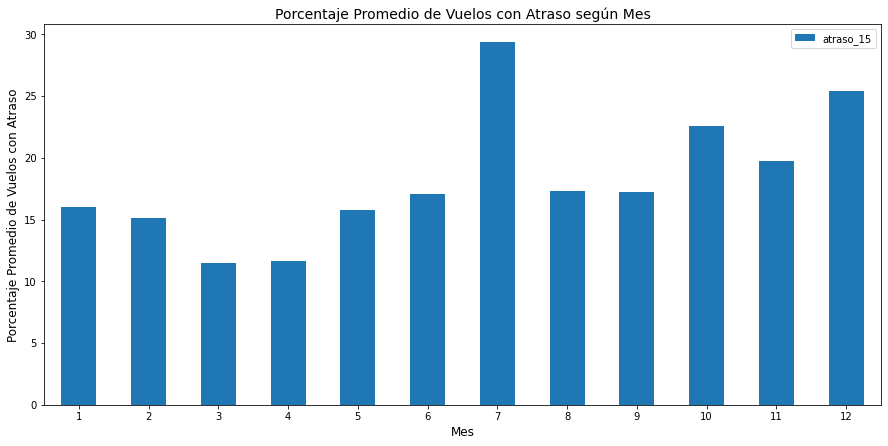

In [196]:
ax=df_mes.plot(x="MES", y="atraso_15", kind="bar", figsize=(15,7), rot=0)
ax.set_xlabel("Mes", fontsize=12)
ax.set_ylabel("Porcentaje Promedio de Vuelos con Atraso", fontsize=12)
ax.set_title("Porcentaje Promedio de Vuelos con Atraso según Mes", fontsize=14)

### Tasa de Atraso por Día de la Semana

In [197]:
df_dianom_min = df_scl.groupby("DIANOM")["diff_min"].mean().reset_index()
df_dianom_min

,DIANOM,diff_min
0,Domingo,7.930788
1,Jueves,9.521120
2,Lunes,9.980653
3,Martes,8.324777
4,Miercoles,8.540835
5,Sabado,8.315014
6,Viernes,10.891469


Text(0.5, 1.0, 'Atraso Promedio (min.) según Día de la Semana')

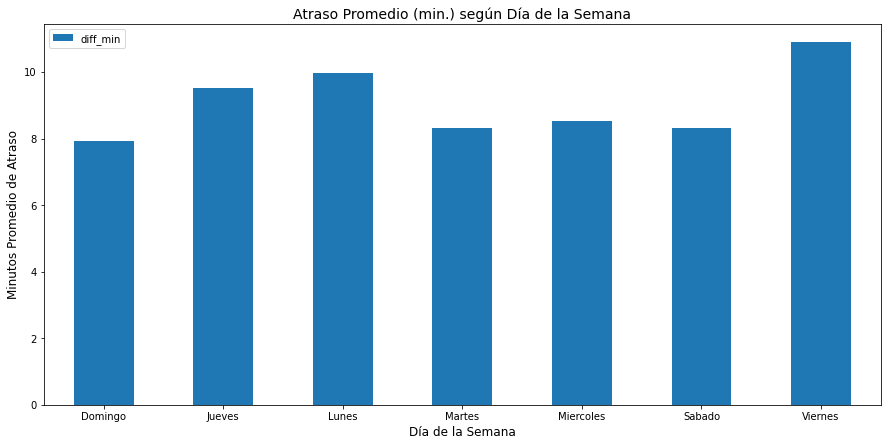

In [200]:
ax=df_dianom_min.plot(x="DIANOM", y="diff_min", kind="bar", figsize=(15,7), rot=0)
ax.set_xlabel("Día de la Semana", fontsize=12)
ax.set_ylabel("Minutos Promedio de Atraso", fontsize=12)
ax.set_title("Atraso Promedio (min.) según Día de la Semana", fontsize=14)

In [201]:
df_dianom = df_scl.groupby("DIANOM")["atraso_15"].mean().reset_index()
df_dianom["atraso_15"] = df_dianom["atraso_15"]*100
df_dianom

,DIANOM,atraso_15
0,Domingo,16.108616
1,Jueves,19.949273
2,Lunes,20.215181
3,Martes,16.911613
4,Miercoles,17.084962
5,Sabado,16.319444
6,Viernes,22.201710


Text(0.5, 1.0, 'Porcentaje Promedio de Vuelos con Atraso según Día de la Semana')

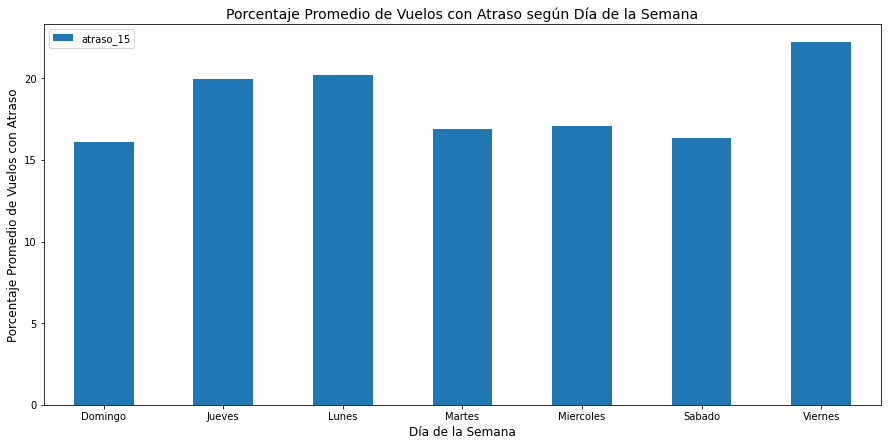

In [203]:
ax=df_dianom.plot(x="DIANOM", y="atraso_15", kind="bar", figsize=(15,7), rot=0)
ax.set_xlabel("Día de la Semana", fontsize=12)
ax.set_ylabel("Porcentaje Promedio de Vuelos con Atraso", fontsize=12)
ax.set_title("Porcentaje Promedio de Vuelos con Atraso según Día de la Semana", fontsize=14)

### Tasa de Atraso por Temporada

In [204]:
df_temp_min = df_scl.groupby("temporada_alta")["diff_min"].mean().reset_index()
df_temp_min

,temporada_alta,diff_min
0,0,8.825191
1,1,9.681179


In [205]:
df_temp = df_scl.groupby("temporada_alta")["atraso_15"].mean().reset_index()
df_temp["atraso_15"] = df_temp["atraso_15"]*100
df_temp

,temporada_alta,atraso_15
0,0,17.920958
1,1,19.637993


### Tasa de Atraso por Tipo de Vuelo

In [206]:
df_scl.groupby("TIPOVUELO")["diff_min"].mean().reset_index()

,TIPOVUELO,diff_min
0,I,10.638892
1,N,7.819510


In [207]:
df_tipovuelo = df_scl.groupby("TIPOVUELO")["atraso_15"].mean().reset_index()
df_tipovuelo["atraso_15"] = df_tipovuelo["atraso_15"]*100
df_tipovuelo

,TIPOVUELO,atraso_15
0,I,22.560819
1,N,15.057079


## Modelos

### Variables Adicionales

##### Vuelo, Aerolínea, Destino Programado vs Operación

In [208]:
df_scl["Vlo_diff"] = np.where(df_scl["Vlo-I"]!=df_scl["Vlo-O"], 1, 0)
df_scl["Des_diff"] = np.where(df_scl["Des-I"]!=df_scl["Des-O"], 1, 0)
df_scl["Emp_diff"] = np.where(df_scl["Emp-I"]!=df_scl["Emp-O"], 1, 0)

##### Porcentaje de Atrasos de la semana anterior para el mismo Destino - Aerolínea

In [230]:
df_scl["sem_anterior"] = (df_scl["Fecha-I"] - dt.timedelta(days=7)).dt.normalize()
df_scl["sem_anterior"]

0       2016-12-25
1       2016-12-26
2       2016-12-27
3       2016-12-28
4       2016-12-29
           ...    
68201   2017-12-15
68202   2017-12-18
68203   2017-12-20
68204   2017-12-22
68205   2017-12-24
Name: sem_anterior, Length: 68206, dtype: datetime64[ns]

In [231]:
df_scl["Fecha-I_dia"] = df_scl["Fecha-I"].dt.normalize()

In [232]:
df_sem_anterior = df_scl.groupby(["OPERA", "SIGLADES", "Fecha-I_dia"])["atraso_15"].mean().reset_index()
df_sem_anterior = df_sem_anterior.rename(columns={"atraso_15": "atraso_sem_anterior"})
df_sem_anterior

,OPERA,SIGLADES,Fecha-I_dia,atraso_sem_anterior
0,Aerolineas Argentinas,Buenos Aires,2017-01-01,0.0
1,Aerolineas Argentinas,Buenos Aires,2017-01-02,0.0
2,Aerolineas Argentinas,Buenos Aires,2017-01-03,0.6
3,Aerolineas Argentinas,Buenos Aires,2017-01-04,0.6
4,Aerolineas Argentinas,Buenos Aires,2017-01-05,0.2
...,...,...,...,...
25184,United Airlines,Houston,2017-12-28,0.0
25185,United Airlines,Houston,2017-12-29,0.0
25186,United Airlines,Houston,2017-12-30,0.0
25187,United Airlines,Houston,2017-12-31,0.0


In [236]:
df_scl["atraso_sem_anterior"] = df_scl.merge(df_sem_anterior, right_on=["OPERA", "SIGLADES", "Fecha-I_dia"], left_on=["OPERA", "SIGLADES", "sem_anterior"], how="left")["atraso_sem_anterior"]

In [237]:
df_scl.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,temporada_alta,diff_min,atraso_15,periodo_dia,Vlo_diff,Des_diff,Emp_diff,sem_anterior,Fecha-I_dia,atraso_sem_anterior
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,1,3,0,noche,0,0,0,2016-12-25,2017-01-01,NaN
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,1,9,0,noche,0,0,0,2016-12-26,2017-01-02,NaN
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,1,9,0,noche,0,0,0,2016-12-27,2017-01-03,NaN
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,1,3,0,noche,0,0,0,2016-12-28,2017-01-04,NaN
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,1,-2,0,noche,0,0,0,2016-12-29,2017-01-05,NaN


In [241]:
df_scl["atraso_sem_anterior"].isna().sum()

2084

In [245]:
df_atraso_mean = df_scl.groupby(["OPERA", "SIGLADES"])["atraso_15"].mean().reset_index()
df_atraso_mean = df_atraso_mean.rename(columns={"atraso_15": "atraso_mean"})
df_atraso_mean.head()

,OPERA,SIGLADES,atraso_mean
0,Aerolineas Argentinas,Buenos Aires,0.240123
1,Aeromexico,Ciudad de Mexico,0.028490
2,Air Canada,Buenos Aires,0.599291
3,Air Canada,Toronto,0.314488
4,Air France,Paris,0.083799


In [247]:
df_scl["atraso_mean"] = df_scl.merge(df_atraso_mean, right_on=["OPERA", "SIGLADES"], left_on=["OPERA", "SIGLADES"], how="left")["atraso_mean"]

In [248]:
df_scl["atraso_sem_anterior"] = np.where(df_scl["atraso_sem_anterior"].isna(), 
                                         df_scl["atraso_mean"],
                                         df_scl["atraso_sem_anterior"])

In [249]:
df_scl["atraso_sem_anterior"].isna().sum()

0

##### Empresa con más Vuelos durante el día

In [257]:
df_opera = df_scl.groupby(["Fecha-I_dia", "OPERA"])["atraso_15"].count().reset_index()
df_opera

,Fecha-I_dia,OPERA,atraso_15
0,2017-01-01,Aerolineas Argentinas,4
1,2017-01-01,Aeromexico,1
2,2017-01-01,Air Canada,2
3,2017-01-01,Air France,1
4,2017-01-01,Alitalia,1
...,...,...,...
6381,2017-12-31,Latin American Wings,5
6382,2017-12-31,Oceanair Linhas Aereas,2
6383,2017-12-31,Qantas Airways,1
6384,2017-12-31,Sky Airline,42


In [262]:
df_opera_max = df_opera.sort_values(["Fecha-I_dia", "atraso_15"], ascending=False).groupby(["Fecha-I_dia"]).first().reset_index()
df_opera_max.head()

,Fecha-I_dia,OPERA,atraso_15
0,2017-01-01,Grupo LATAM,103
1,2017-01-02,Grupo LATAM,126
2,2017-01-03,Grupo LATAM,125
3,2017-01-04,Grupo LATAM,122
4,2017-01-05,Grupo LATAM,124


In [263]:
df_opera_max["OPERA"].unique()

array(['Grupo LATAM'], dtype=object)

##### Cantidad de Empresas que Operan en el Día

In [269]:
df_opera_dia = df_scl.groupby(["Fecha-I_dia"])["OPERA"].apply(lambda x: len(list(np.unique(x)))).reset_index()
df_opera_dia = df_opera_dia.rename(columns={"OPERA": "NUM_OPERA"})
df_opera_dia

,Fecha-I_dia,NUM_OPERA
0,2017-01-01,16
1,2017-01-02,16
2,2017-01-03,17
3,2017-01-04,17
4,2017-01-05,17
...,...,...
360,2017-12-27,21
361,2017-12-28,20
362,2017-12-29,20
363,2017-12-30,19


In [271]:
df_scl["NUM_OPERA"] = df_scl.merge(df_opera_dia, on="Fecha-I_dia", how="left")["NUM_OPERA"]

In [272]:
df_scl["NUM_OPERA"].max()

22

In [273]:
df_scl["OPERA"].nunique()

23

Dividir por max de empresas que OPERA quizás.

##### Proporción de Vuelos Nacionales vs Internacionales

In [287]:
df_vuelos = df_scl.groupby(["Fecha-I_dia", "TIPOVUELO"])["atraso_15"].count().reset_index()
df_vuelos = df_vuelos.rename(columns={"atraso_15": "Count"})
df_vuelos

,Fecha-I_dia,TIPOVUELO,Count
0,2017-01-01,I,81
1,2017-01-01,N,89
2,2017-01-02,I,88
3,2017-01-02,N,110
4,2017-01-03,I,91
...,...,...,...
725,2017-12-29,N,127
726,2017-12-30,I,91
727,2017-12-30,N,82
728,2017-12-31,I,94


In [289]:
df_vuelos["TIPOVUELO_RATIO"] = df_vuelos.groupby("Fecha-I_dia")["Count"].apply(lambda x: x/x.sum())
df_vuelos = df_vuelos[df_vuelos["TIPOVUELO"]=="N"]
df_vuelos.head()

,Fecha-I_dia,TIPOVUELO,Count,TIPOVUELO_RATIO
1,2017-01-01,N,89,0.523529
3,2017-01-02,N,110,0.555556
5,2017-01-03,N,104,0.533333
7,2017-01-04,N,101,0.523316
9,2017-01-05,N,109,0.556122


In [295]:
df_scl = df_scl.merge(df_vuelos[["Fecha-I_dia", "TIPOVUELO_RATIO"]], on="Fecha-I_dia", how="left")

In [296]:
df_scl.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,periodo_dia,Vlo_diff,Des_diff,Emp_diff,sem_anterior,Fecha-I_dia,atraso_sem_anterior,atraso_mean,NUM_OPERA,TIPOVUELO_RATIO
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,noche,0,0,0,2016-12-25,2017-01-01,0.065163,0.065163,16,0.523529
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,noche,0,0,0,2016-12-26,2017-01-02,0.065163,0.065163,16,0.555556
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,noche,0,0,0,2016-12-27,2017-01-03,0.065163,0.065163,17,0.533333
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,noche,0,0,0,2016-12-28,2017-01-04,0.065163,0.065163,17,0.523316
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,noche,0,0,0,2016-12-29,2017-01-05,0.065163,0.065163,17,0.556122


##### Días Feriados

In [303]:
feriados_2017 = pd.read_csv("feriados_2017.csv")
feriados_2017["Dia"] = pd.to_datetime(feriados_2017["Dia"], dayfirst=True)
feriados_2017

,Dia
0,2017-01-01
1,2017-04-14
2,2017-04-15
3,2017-04-19
4,2017-05-01
5,2017-05-21
6,2017-06-26
7,2017-07-16
8,2017-08-15
9,2017-09-18


In [306]:
feriados_2017["Feriado"] = 1

In [318]:
df_scl["Feriado"] = df_scl.merge(feriados_2017, right_on="Dia", left_on="Fecha-I_dia", how="left")["Feriado"].fillna(0)

In [319]:
df_scl["Feriado"] = np.where(df_scl["DIANOM"]=="Domingo", 1, df_scl["Feriado"])

In [322]:
df_scl["dia_anterior"] = (df_scl["Fecha-I"] - dt.timedelta(days=1)).dt.normalize()

In [327]:
df_scl["Feriado_ayer"] = df_scl.merge(feriados_2017, right_on="Dia", left_on="dia_anterior", how="left")["Feriado_y"].fillna(0)

##### Destino principal del Día

In [330]:
df_dest = df_scl.groupby(["Fecha-I_dia", "SIGLADES"])["atraso_15"].count().reset_index()
df_dest

,Fecha-I_dia,SIGLADES,atraso_15
0,2017-01-01,Antofagasta,12
1,2017-01-01,Arica,6
2,2017-01-01,Atlanta,1
3,2017-01-01,Balmaceda,2
4,2017-01-01,Bogota,5
...,...,...,...
14242,2017-12-31,Sao Paulo,10
14243,2017-12-31,Sydney,1
14244,2017-12-31,Temuco,7
14245,2017-12-31,Toronto,1


In [337]:
df_dest_max = df_dest.sort_values(["Fecha-I_dia", "atraso_15"], ascending=False).groupby(["Fecha-I_dia"]).first().reset_index()
df_dest_max = df_dest_max.rename(columns={"SIGLADES": "SIGLADES_MAIN"})
df_dest_max.head()

,Fecha-I_dia,SIGLADES_MAIN,atraso_15
0,2017-01-01,Buenos Aires,16
1,2017-01-02,Buenos Aires,19
2,2017-01-03,Buenos Aires,19
3,2017-01-04,Buenos Aires,19
4,2017-01-05,Antofagasta,19


In [338]:
df_dest_max["SIGLADES_MAIN"].value_counts()

Buenos Aires    203
Antofagasta     134
Calama           25
Lima              2
Concepcion        1
Name: SIGLADES_MAIN, dtype: int64

In [341]:
df_scl = df_scl.merge(df_dest_max.iloc[:,:2], on="Fecha-I_dia", how="left")

In [342]:
df_scl.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,sem_anterior,Fecha-I_dia,atraso_sem_anterior,atraso_mean,NUM_OPERA,TIPOVUELO_RATIO,Feriado,dia_anterior,Feriado_ayer,SIGLADES_MAIN
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2016-12-25,2017-01-01,0.065163,0.065163,16,0.523529,1.0,2016-12-31,0.0,Buenos Aires
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2016-12-26,2017-01-02,0.065163,0.065163,16,0.555556,0.0,2017-01-01,1.0,Buenos Aires
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2016-12-27,2017-01-03,0.065163,0.065163,17,0.533333,0.0,2017-01-02,0.0,Buenos Aires
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2016-12-28,2017-01-04,0.065163,0.065163,17,0.523316,0.0,2017-01-03,0.0,Buenos Aires
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2016-12-29,2017-01-05,0.065163,0.065163,17,0.556122,0.0,2017-01-04,0.0,Antofagasta


In [343]:
df_scl.isna().sum()

Fecha-I                0
Vlo-I                  0
Ori-I                  0
Des-I                  0
Emp-I                  0
Fecha-O                0
Vlo-O                  1
Ori-O                  0
Des-O                  0
Emp-O                  0
DIA                    0
MES                    0
AÑO                    0
DIANOM                 0
TIPOVUELO              0
OPERA                  0
SIGLAORI               0
SIGLADES               0
temporada_alta         0
diff_min               0
atraso_15              0
periodo_dia            0
Vlo_diff               0
Des_diff               0
Emp_diff               0
sem_anterior           0
Fecha-I_dia            0
atraso_sem_anterior    0
atraso_mean            0
NUM_OPERA              0
TIPOVUELO_RATIO        0
Feriado                0
dia_anterior           0
Feriado_ayer           0
SIGLADES_MAIN          0
dtype: int64

In [344]:
df_scl["Vlo-O"] = np.where(df_scl["Vlo-O"].isna(), df_scl["Vlo-I"], df_scl["Vlo-O"])

In [345]:
df_scl.isna().sum().sum()

0

In [346]:
df_scl.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'diff_min',
       'atraso_15', 'periodo_dia', 'Vlo_diff', 'Des_diff', 'Emp_diff',
       'sem_anterior', 'Fecha-I_dia', 'atraso_sem_anterior', 'atraso_mean',
       'NUM_OPERA', 'TIPOVUELO_RATIO', 'Feriado', 'dia_anterior',
       'Feriado_ayer', 'SIGLADES_MAIN'],
      dtype='object')

In [350]:
df_scl_model = df_scl[["DIA", "MES", "DIANOM", "TIPOVUELO", "OPERA", "SIGLADES", "temporada_alta",
                       "periodo_dia", 'Vlo_diff', 'Des_diff', 'Emp_diff', 'atraso_sem_anterior',
                       'NUM_OPERA', 'TIPOVUELO_RATIO', 'Feriado', 'Feriado_ayer', 'SIGLADES_MAIN', "atraso_15"]]

In [351]:
df_scl_model.head()

,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES,temporada_alta,periodo_dia,Vlo_diff,Des_diff,Emp_diff,atraso_sem_anterior,NUM_OPERA,TIPOVUELO_RATIO,Feriado,Feriado_ayer,SIGLADES_MAIN,atraso_15
0,1,1,Domingo,I,American Airlines,Miami,1,noche,0,0,0,0.065163,16,0.523529,1.0,0.0,Buenos Aires,0
1,2,1,Lunes,I,American Airlines,Miami,1,noche,0,0,0,0.065163,16,0.555556,0.0,1.0,Buenos Aires,0
2,3,1,Martes,I,American Airlines,Miami,1,noche,0,0,0,0.065163,17,0.533333,0.0,0.0,Buenos Aires,0
3,4,1,Miercoles,I,American Airlines,Miami,1,noche,0,0,0,0.065163,17,0.523316,0.0,0.0,Buenos Aires,0
4,5,1,Jueves,I,American Airlines,Miami,1,noche,0,0,0,0.065163,17,0.556122,0.0,0.0,Antofagasta,0


In [352]:
df_scl_model.shape

(68206, 18)

In [370]:
scaler = MinMaxScaler()
num_opera = scaler.fit_transform(np.asarray(df_scl_model["NUM_OPERA"]).reshape(-1,1))
num_opera

array([[0.33333333],
       [0.33333333],
       [0.44444444],
       ...,
       [0.88888889],
       [0.77777778],
       [0.88888889]])

In [373]:
df_scl_model["NUM_OPERA"] = pd.Series(num_opera.reshape(num_opera.shape[0],))
df_scl_model["NUM_OPERA"]

0        0.333333
1        0.333333
2        0.444444
3        0.444444
4        0.444444
           ...   
68201    0.888889
68202    0.555556
68203    0.888889
68204    0.777778
68205    0.888889
Name: NUM_OPERA, Length: 68206, dtype: float64

In [376]:
df_X = df_scl_model.loc[:, df_scl_model.columns!="atraso_15"]
df_Y = df_scl_model["atraso_15"]

In [379]:
df_X["Feriado"] = df_X["Feriado"].astype(int)
df_X["Feriado_ayer"] = df_X["Feriado_ayer"].astype(int)

In [381]:
df_X.head()

,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES,temporada_alta,periodo_dia,Vlo_diff,Des_diff,Emp_diff,atraso_sem_anterior,NUM_OPERA,TIPOVUELO_RATIO,Feriado,Feriado_ayer,SIGLADES_MAIN
0,1,1,Domingo,I,American Airlines,Miami,1,noche,0,0,0,0.065163,0.333333,0.523529,1,0,Buenos Aires
1,2,1,Lunes,I,American Airlines,Miami,1,noche,0,0,0,0.065163,0.333333,0.555556,0,1,Buenos Aires
2,3,1,Martes,I,American Airlines,Miami,1,noche,0,0,0,0.065163,0.444444,0.533333,0,0,Buenos Aires
3,4,1,Miercoles,I,American Airlines,Miami,1,noche,0,0,0,0.065163,0.444444,0.523316,0,0,Buenos Aires
4,5,1,Jueves,I,American Airlines,Miami,1,noche,0,0,0,0.065163,0.444444,0.556122,0,0,Antofagasta


In [385]:
categorical_columns = ["DIA", "MES", "DIANOM", "TIPOVUELO", "OPERA", "SIGLADES", "temporada_alta",
                       "periodo_dia", 'Vlo_diff', 'Des_diff', 'Emp_diff', 'Feriado', 'Feriado_ayer', 'SIGLADES_MAIN']

for col in categorical_columns:
    df_X[col] = df_X[col].astype("category")

In [384]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68206 entries, 0 to 68205
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   DIA                  68206 non-null  category
 1   MES                  68206 non-null  category
 2   DIANOM               68206 non-null  category
 3   TIPOVUELO            68206 non-null  category
 4   OPERA                68206 non-null  category
 5   SIGLADES             68206 non-null  category
 6   temporada_alta       68206 non-null  category
 7   periodo_dia          68206 non-null  category
 8   Vlo_diff             68206 non-null  category
 9   Des_diff             68206 non-null  category
 10  Emp_diff             68206 non-null  category
 11  atraso_sem_anterior  68206 non-null  float64 
 12  NUM_OPERA            68206 non-null  float64 
 13  TIPOVUELO_RATIO      68206 non-null  float64 
 14  Feriado              68206 non-null  category
 15  Feriado_ayer       

In [386]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.3, stratify=df_Y)

In [387]:
import lightgbm
from lightgbm import LGBMClassifier

In [388]:
fit_params={"early_stopping_rounds":10, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 25,
            'feature_name': 'auto', 
            'categorical_feature': 'auto'
           }

In [389]:
model_LightGBM = LGBMClassifier(num_leaves=100,
                                max_depth=-1,
                                n_jobs=5,
                                n_estimators=1000,
                                learning_rate=0.1,
                                class_weight="balanced")
model_LightGBM.fit(X_train, y_train, **fit_params)

[25]	valid's auc: 0.726415	valid's binary_logloss: 0.591134
[50]	valid's auc: 0.733343	valid's binary_logloss: 0.568474


LGBMClassifier(class_weight='balanced', n_estimators=1000, n_jobs=5,
               num_leaves=100)

In [390]:
y_pred_train = model_LightGBM.predict(X_train)
y_pred_test = model_LightGBM.predict(X_test)

In [391]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79     16678
           1       0.33      0.63      0.43      3784

    accuracy                           0.69     20462
   macro avg       0.61      0.67      0.61     20462
weighted avg       0.79      0.69      0.72     20462



In [405]:
df_X2 = df_X[['DIA', 'MES', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLADES', 'temporada_alta', 'periodo_dia',
              "Feriado", "Feriado_ayer"]]

In [406]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_X2, df_Y, test_size=0.3, stratify=df_Y)

In [407]:
fit_params={"early_stopping_rounds":10, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test2,y_test2)],
            'eval_names': ['valid'],
            'verbose': 25,
            'feature_name': 'auto', 
            'categorical_feature': 'auto'
           }

In [408]:
model_LightGBM2 = LGBMClassifier(num_leaves=100,
                                max_depth=-1,
                                n_jobs=5,
                                n_estimators=1000,
                                learning_rate=0.1,
                                class_weight="balanced")
model_LightGBM2.fit(X_train2, y_train2, **fit_params)

[25]	valid's auc: 0.723638	valid's binary_logloss: 0.597067
[50]	valid's auc: 0.729868	valid's binary_logloss: 0.576511


LGBMClassifier(class_weight='balanced', n_estimators=1000, n_jobs=5,
               num_leaves=100)

In [409]:
y_pred_train2 = model_LightGBM2.predict(X_train2)
y_pred_test2 = model_LightGBM2.predict(X_test2)

In [410]:
print(classification_report(y_test2, y_pred_test2))

              precision    recall  f1-score   support

           0       0.89      0.72      0.79     16678
           1       0.33      0.62      0.43      3784

    accuracy                           0.70     20462
   macro avg       0.61      0.67      0.61     20462
weighted avg       0.79      0.70      0.73     20462



In [423]:
pd.Series(model_LightGBM.feature_importances_,index=df_X.columns.tolist()).sort_values(ascending=False) / sum(model_LightGBM.feature_importances_)

DIA                    0.249012
SIGLADES               0.156566
TIPOVUELO_RATIO        0.129556
MES                    0.106500
atraso_sem_anterior    0.068511
periodo_dia            0.067633
OPERA                  0.056434
NUM_OPERA              0.051823
DIANOM                 0.046992
Emp_diff               0.018006
Feriado                0.012736
temporada_alta         0.011419
Feriado_ayer           0.007686
SIGLADES_MAIN          0.006368
TIPOVUELO              0.006148
Vlo_diff               0.004611
Des_diff               0.000000
dtype: float64

In [420]:
pd.Series(model_LightGBM2.feature_importances_,index=['DIA', 'MES', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLADES', 'temporada_alta', 'periodo_dia',"Feriado", "Feriado_ayer"]).sort_values(ascending=False) / sum(model_LightGBM2.feature_importances_)

DIA               0.286637
SIGLADES          0.203014
MES               0.147872
periodo_dia       0.125186
OPERA             0.074681
DIANOM            0.066898
temporada_alta    0.036761
TIPOVUELO         0.027157
Feriado           0.020202
Feriado_ayer      0.011591
dtype: float64